In [1]:
from datascience import *
from datascience import Table
import pandas as pd
import matplotlib
matplotlib.use('Agg')
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
RR_plant_growth_df = Table().read_table('Biochar-compost-data - RR_Plant_Growth_Metrics.csv')

RR_normalized_plant_growth_df = RR_plant_growth_df.where('shoot_length_cm', are.above(0))

RR_avg_plant_growth_per_treatment = RR_normalized_plant_growth_df.drop(
    'setup_date', 'Date', 'termination_date', 'soil', 'pot_label', 'soil_sample_label').group('treatment', np.average)

RR_std_plant_growth_per_treatment = RR_normalized_plant_growth_df.drop(
    'setup_date', 'Date', 'termination_date', 'soil', 'pot_label', 'soil_sample_label').group('treatment', np.std)
RR_std_plant_growth_per_treatment

In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Convert Table to pandas DataFrame
RR_normalized_df = RR_normalized_plant_growth_df.to_df()

# Define your ANOVA model
# Assuming 'shoot_length_cm' is the dependent variable and 'treatment' is the factor
model_shoot_length = ols('shoot_length_cm ~ C(treatment)', data=RR_normalized_df).fit()

# Perform ANOVA
anova_table_shoot_length = sm.stats.anova_lm(model_shoot_length, typ=2)

# Display results
print("ANOVA Table:")
print(anova_table_shoot_length)

ANOVA Table:
                   sum_sq    df         F    PR(>F)
C(treatment)   133.812957   2.0  4.121937  0.020433
Residual      1103.762817  68.0       NaN       NaN


The ANOVA table indicates the following:

Sum of Squares (sum_sq):

C(treatment): The variation in shoot_length_cm explained by differences in the treatment groups (133.81).
Residual: The unexplained variation or error (1103.76).
Degrees of Freedom (df):

C(treatment): 2 degrees of freedom (3 treatment groups - 1).
Residual: 68 degrees of freedom (total observations - number of groups).
F-statistic (F):

The F-value (4.12) tests whether the variation among treatment group means is significantly greater than what would be expected by chance.
p-value (PR(>F)):

The p-value (0.020433) indicates the probability of observing this result, assuming the null hypothesis (no difference among treatment means) is true.
Interpretation:
Significance: The p-value is 0.020433, which is below the common threshold of 0.05. Therefore, you can reject the null hypothesis and conclude that there are statistically significant differences in shoot length among the treatment groups.
Next Steps:
Post-hoc Tests:

Perform pairwise comparisons (e.g., Tukey's HSD) to identify which treatments differ significantly.

In [4]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_shoot_length = pairwise_tukeyhsd(endog=RR_normalized_df['shoot_length_cm'],
                          groups=RR_normalized_df['treatment'],
                          alpha=0.05)
print(tukey_shoot_length)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
        Compost Compost-Biochar   0.8075  0.768 -1.9817 3.5966  False
        Compost         Control   3.2336 0.0191  0.4444 6.0227   True
Compost-Biochar         Control   2.4261   0.11 -0.4206 5.2728  False
---------------------------------------------------------------------


Interpretation of Tukey's HSD Results
Compost vs. Compost-Biochar:

Mean Difference: 0.8075
p-value (p-adj): 0.768
Conclusion: There is no statistically significant difference between the Compost and Compost-Biochar treatments, as the p-value is greater than 0.05.
Compost vs. Control:

Mean Difference: 3.2336
p-value (p-adj): 0.0191
Conclusion: There is a statistically significant difference between the Compost and Control treatments, as the p-value is less than 0.05. The Compost treatment resulted in higher shoot length compared to the Control.
Compost-Biochar vs. Control:

Mean Difference: 2.4261
p-value (p-adj): 0.11
Conclusion: There is no statistically significant difference between the Compost-Biochar and Control treatments, as the p-value is greater than 0.05.
Summary:
The Compost treatment significantly increases shoot length compared to the Control.
No significant differences were observed between Compost and Compost-Biochar or between Compost-Biochar and Control.


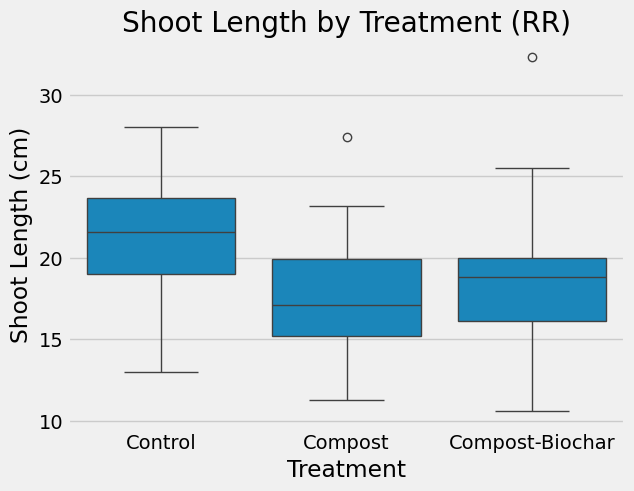

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='treatment', y='shoot_length_cm', data=RR_normalized_df)
plt.title('Shoot Length by Treatment (RR)')
plt.xlabel('Treatment')
plt.ylabel('Shoot Length (cm)')
plt.show()

In [6]:
#For seed survival
model_seed_survival = ols('seed_survival_rate ~ C(treatment)', data=RR_normalized_df).fit()

# Perform ANOVA
anova_seed_survival = sm.stats.anova_lm(model_seed_survival, typ=2)

# Display results
print("ANOVA Table:")
print(anova_seed_survival)

ANOVA Table:
                sum_sq    df         F    PR(>F)
C(treatment)  0.064593   2.0  1.083474  0.344188
Residual      2.026957  68.0       NaN       NaN


In [7]:
tukey_seed_survival = pairwise_tukeyhsd(endog=RR_normalized_df['seed_survival_rate'],
                          groups=RR_normalized_df['treatment'],
                          alpha=0.05)
print(tukey_seed_survival)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
        Compost Compost-Biochar  -0.0496 0.5834 -0.1691   0.07  False
        Compost         Control  -0.0713 0.3316 -0.1908 0.0482  False
Compost-Biochar         Control  -0.0217 0.9045 -0.1437 0.1002  False
---------------------------------------------------------------------


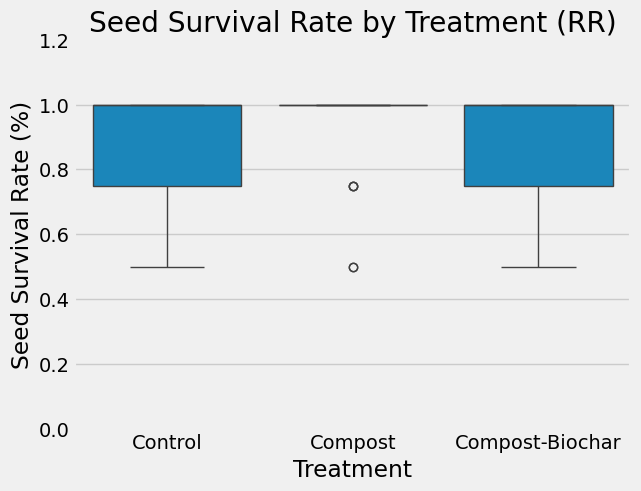

In [8]:
sns.boxplot(x='treatment', y='seed_survival_rate', data=RR_normalized_df)
plt.title('Seed Survival Rate by Treatment (RR)')
plt.xlabel('Treatment')
plt.ylabel('Seed Survival Rate (%)')
plt.ylim(0, 1.2)
plt.show()

In [9]:
#Now for num_spikelets
#For seed survival
model_spikelets = ols('num_spikelets ~ C(treatment)', data=RR_normalized_df).fit()

# Perform ANOVA
anova_spikelets = sm.stats.anova_lm(model_spikelets, typ=2)

# Display results
print("ANOVA Table:")
print(anova_spikelets)

ANOVA Table:
                 sum_sq    df         F    PR(>F)
C(treatment)   1.674268   2.0  0.821626  0.444033
Residual      69.283478  68.0       NaN       NaN


In [10]:
tukey_spikelets = pairwise_tukeyhsd(endog=RR_normalized_df['num_spikelets'],
                          groups=RR_normalized_df['treatment'],
                          alpha=0.05)
print(tukey_spikelets)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
        Compost Compost-Biochar   0.3461 0.4651 -0.3527 1.0449  False
        Compost         Control   0.0417 0.9888 -0.6571 0.7405  False
Compost-Biochar         Control  -0.3043 0.5653 -1.0176 0.4089  False
---------------------------------------------------------------------


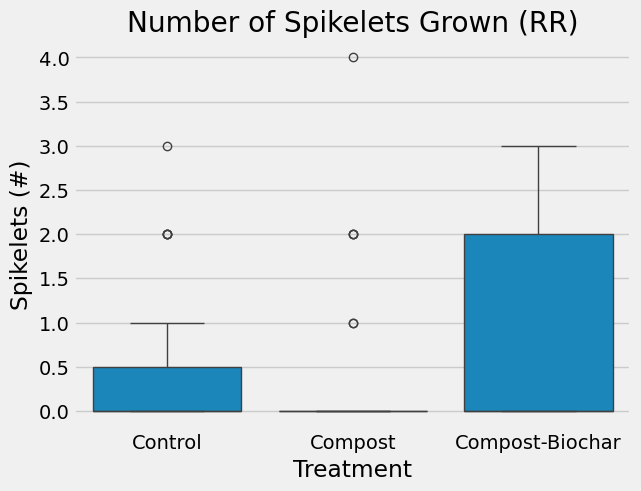

In [11]:
sns.boxplot(x='treatment', y='num_spikelets', data=RR_normalized_df)
plt.title('Number of Spikelets Grown (RR)')
plt.xlabel('Treatment')
plt.ylabel('Spikelets (#)')
plt.show()

In [12]:
#Now for root length
model_root_length = ols('root_length_cm ~ C(treatment)', data=RR_normalized_df).fit()
anova_root_length = sm.stats.anova_lm(model_root_length, typ=2)
print("ANOVA Table:")
print(anova_root_length)

ANOVA Table:
                  sum_sq    df         F   PR(>F)
C(treatment)   43.574563   2.0  1.529421  0.22402
Residual      968.690226  68.0       NaN      NaN


In [13]:
tukey_root_length = pairwise_tukeyhsd(endog=RR_normalized_df['root_length_cm'],
                          groups=RR_normalized_df['treatment'],
                          alpha=0.05)
print(tukey_root_length)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
        Compost Compost-Biochar  -0.1563 0.9887 -2.7693 2.4566  False
        Compost         Control  -1.7433 0.2532 -4.3562 0.8696  False
Compost-Biochar         Control   -1.587 0.3334 -4.2538 1.0798  False
---------------------------------------------------------------------


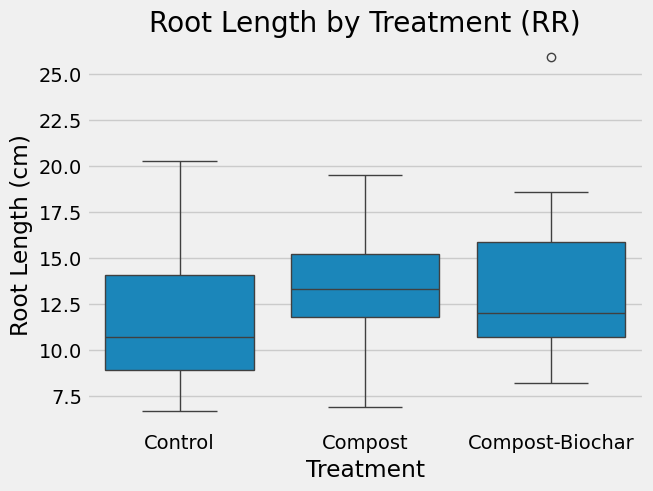

In [14]:
sns.boxplot(x='treatment', y='root_length_cm', data=RR_normalized_df)
plt.title('Root Length by Treatment (RR)')
plt.xlabel('Treatment')
plt.ylabel('Root Length (cm)')
plt.show()

In [15]:
#Now for shoot_root_biomass_g
model_shoot_root_biomass = ols('shoot_root_biomass_g ~ C(treatment)', data=RR_normalized_df).fit()
anova_shoot_root_biomass = sm.stats.anova_lm(model_shoot_root_biomass, typ=2)
print("ANOVA Table:")
print(anova_shoot_root_biomass)

ANOVA Table:
                sum_sq    df         F    PR(>F)
C(treatment)  0.003485   2.0  0.200755  0.818596
Residual      0.590146  68.0       NaN       NaN


In [16]:
tukey_shoot_root_biomass = pairwise_tukeyhsd(endog=RR_normalized_df['shoot_root_biomass_g'],
                          groups=RR_normalized_df['treatment'],
                          alpha=0.05)
print(tukey_shoot_root_biomass)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
        Compost Compost-Biochar  -0.0005 0.9998  -0.065  0.064  False
        Compost         Control   0.0147 0.8482 -0.0498 0.0792  False
Compost-Biochar         Control   0.0152 0.8448 -0.0506  0.081  False
---------------------------------------------------------------------


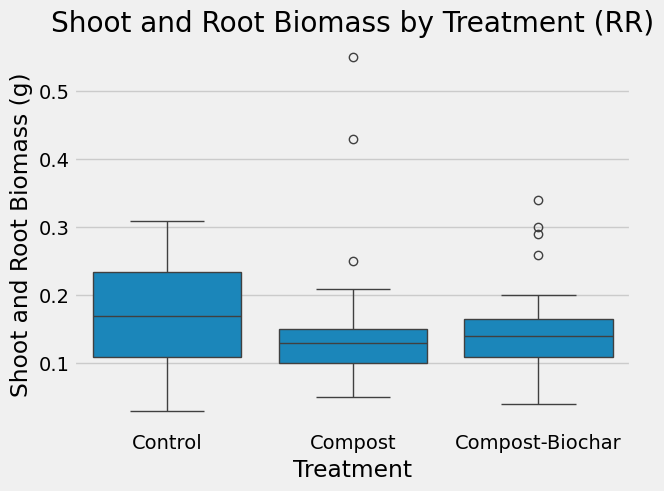

In [17]:
sns.boxplot(x='treatment', y='shoot_root_biomass_g', data=RR_normalized_df)
plt.title('Shoot and Root Biomass by Treatment (RR)')
plt.xlabel('Treatment')
plt.ylabel('Shoot and Root Biomass (g)')
plt.show()